In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 28, 6

In [2]:
data = pd.read_csv('ds_p1.csv')
print (data.head())

FileNotFoundError: File b'ds_p1.csv' does not exist

In [81]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')
data = pd.read_csv('ds_p1.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print (data.head())

            AVAILABILITY  MAX_RT   MIN_RT  AVG_RT  THROUGHPUT  SERVICE_ID  \
Month                                                                       
2011-01-07           363    3758  1146.36     120        1.96           1   
2011-01-14           252    1945   806.03     166        2.71           1   
2011-01-21           322    6817  1463.86     123        2.02           1   
2011-01-28            95     689   255.51     269        4.45           1   
2011-02-04           222    2105   639.10     199        3.30           1   

             IDX      COST    JOB_ID  TASK_INDEX  TASK_USAGE_IDX  
Month                                                             
2011-01-07  1012  3.432794  39308692           0          752165  
2011-01-14  1014  5.328627  39308692           1          898663  
2011-01-21  1017  1.293431  39308692           1              95  
2011-01-28  1021  3.432794  39308692           0          752165  
2011-02-04  1023  3.432794  39308692           0          

1-  parse_dates: This specifies the column which contains the date-time information. As we say above, the column name       is ‘Month’.


2-  index_col: A key idea behind using Pandas for TS data is that the index has to be the variable depicting date-time     information. So this argument tells pandas to use the ‘Month’ column as index.


3-  date_parser: This specifies a function which converts an input string into datetime variable.


In [68]:
data.index

DatetimeIndex(['2011-01-07', '2011-01-14', '2011-01-21', '2011-01-28',
               '2011-02-04', '2011-02-11', '2011-02-18', '2011-02-25',
               '2011-03-04', '2011-03-11',
               ...
               '2011-05-13', '2011-05-20', '2011-05-27', '2011-06-03',
               '2011-06-10', '2011-06-17', '2011-06-24', '2011-07-01',
               '2011-07-08', '2011-07-15'],
              dtype='datetime64[ns]', name='date-time', length=112, freq=None)

In [69]:
print ('\n Data Types:')
print (data.dtypes)


 Data Types:
AVAILABILITY        int64
MAX_RT              int64
MIN_RT            float64
AVG_RT              int64
THROUGHPUT        float64
SERVICE_ID          int64
IDX                 int64
COST              float64
JOB_ID              int64
TASK_INDEX          int64
TASK_USAGE_IDX      int64
dtype: object


In [ ]:
data=data['THROUGHPUT'] 

In [70]:
#ts=data.get_item('AVG_RT','THROUGHPUT','COST','SERVICE_ID')
ts = data['THROUGHPUT'] 
ts.head()

date-time
2011-01-07    1.96
2011-01-14    2.71
2011-01-21    2.02
2011-01-28    4.45
2011-02-04    3.30
Name: THROUGHPUT, dtype: float64

In [33]:
from datetime import datetime
ts[datetime(2011,1,7)]

1.96

In [28]:
ts['2011-01-07']

1.96

In [77]:
ts['2011-03':'2011-05']

date-time
2011-03-04    2.54
2011-03-11    0.52
2011-03-18    0.61
2011-03-25    0.62
2011-04-01    0.49
2011-04-08    0.59
2011-04-15    4.63
2011-04-22    0.55
2011-04-29    3.86
2011-05-06    2.74
2011-05-13    2.88
2011-05-20    4.55
2011-05-27    4.22
2011-03-04    4.14
2011-03-11    4.57
2011-03-18    4.37
2011-03-25    1.75
2011-04-01    1.28
2011-04-08    1.89
2011-04-15    2.14
2011-04-22    1.97
2011-04-29    2.03
2011-05-06    2.15
2011-05-13    1.92
2011-05-20    2.06
2011-05-27    2.41
2011-03-04    4.77
2011-03-11    4.10
2011-03-18    5.13
2011-03-25    4.65
2011-04-01    5.25
2011-04-08    5.07
2011-04-15    5.58
2011-04-22    5.60
2011-04-29    5.30
2011-05-06    5.17
2011-05-13    5.11
2011-05-20    4.79
2011-05-27    4.58
2011-03-04    4.04
2011-03-11    3.80
2011-03-18    3.72
2011-03-25    3.25
2011-04-01    3.41
2011-04-08    4.23
2011-04-15    3.72
2011-04-22    3.64
2011-04-29    3.68
2011-05-06    3.59
2011-05-13    3.72
2011-05-20    4.21
2011-05-27    2.63
Na

In [82]:
ts1 = data['THROUGHPUT'] 

In [83]:
ts2 = data['AVAILABILITY'] 

In [84]:
ts3 = data['COST']

In [85]:
ts4 = data['AVG_RT']

In [86]:
ts5 = data['MAX_RT']

In [87]:
ts6 = data['MIN_RT']

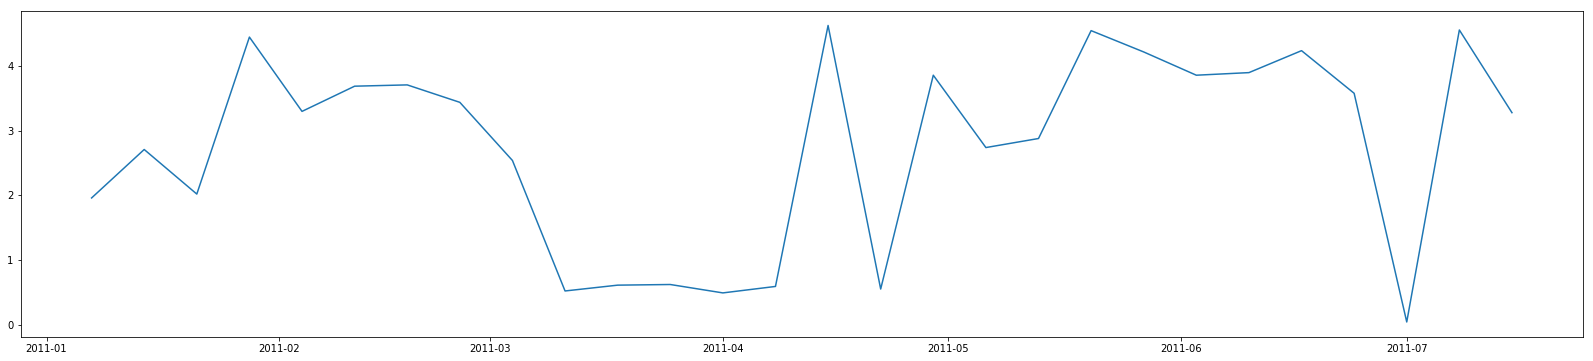

In [88]:
plt.plot(ts1)

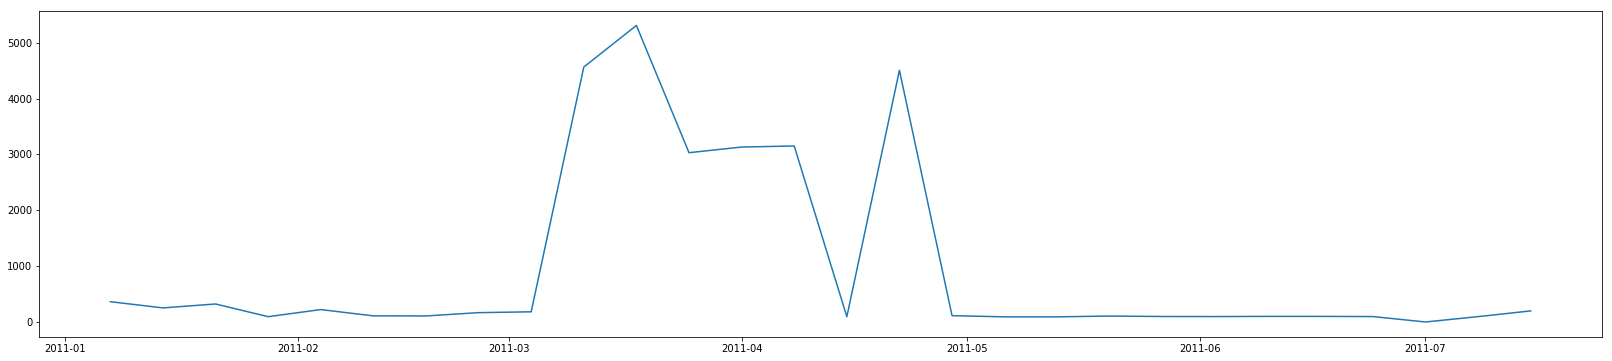

In [91]:
plt.plot(ts2)

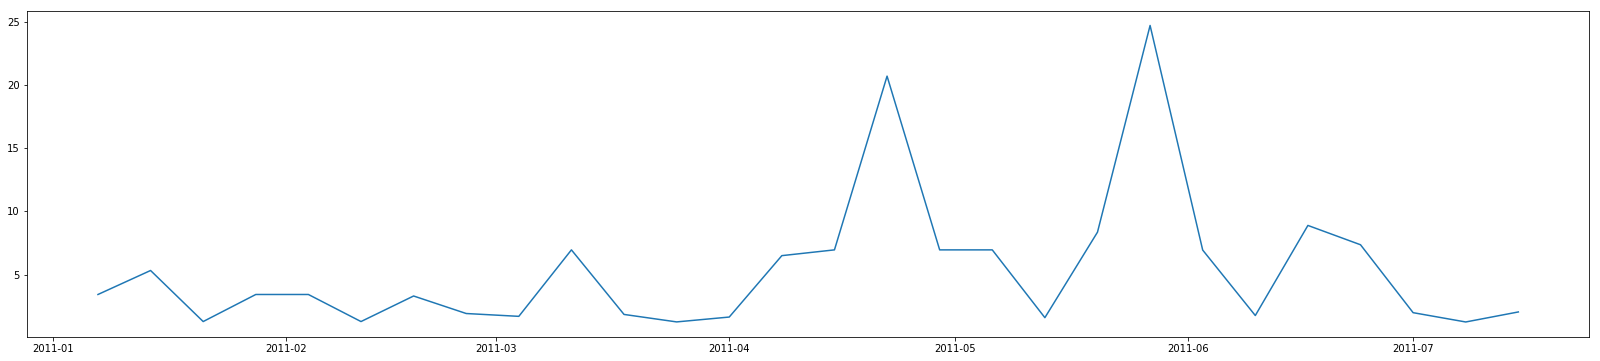

In [92]:
plt.plot(ts3)

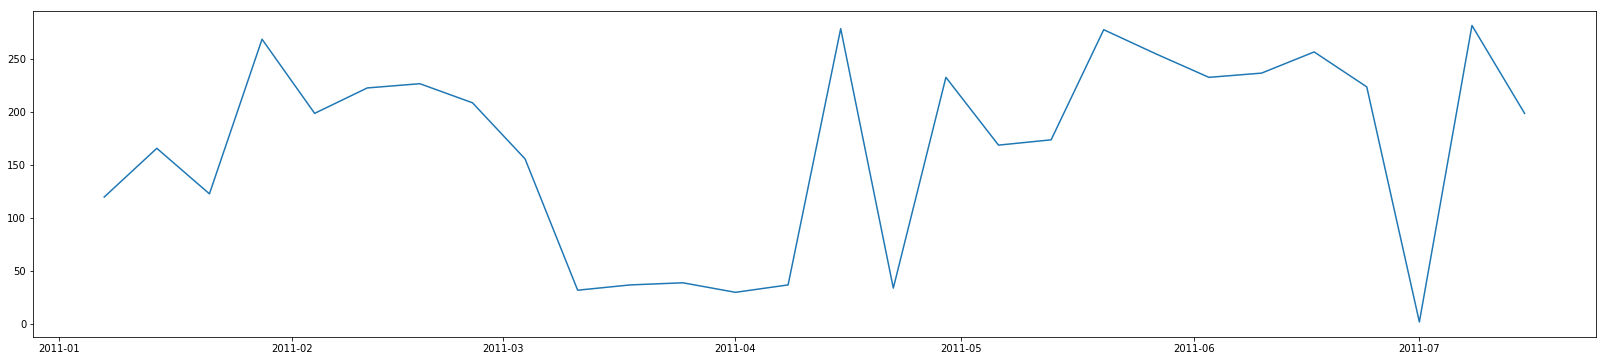

In [93]:
plt.plot(ts4)

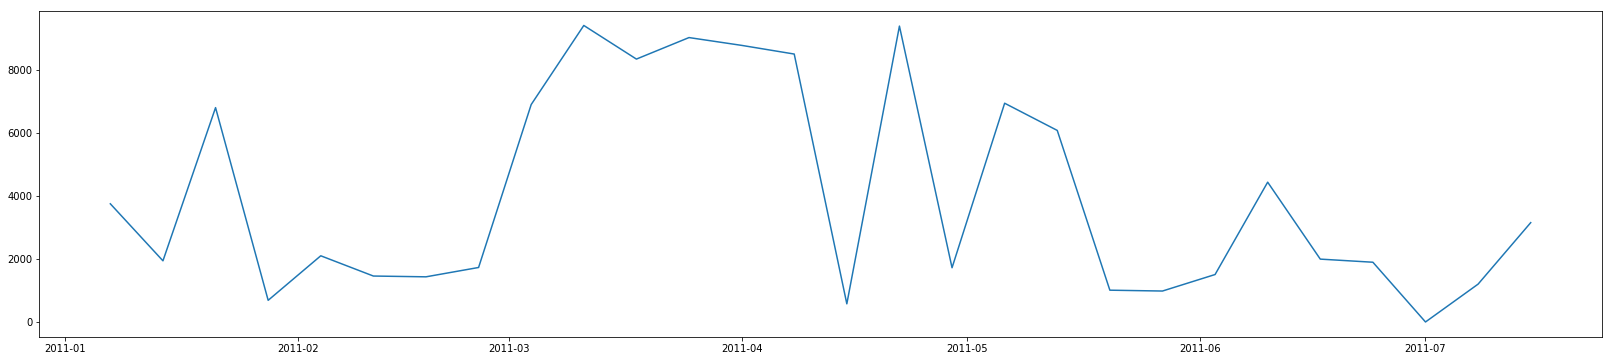

In [94]:
plt.plot(ts5)

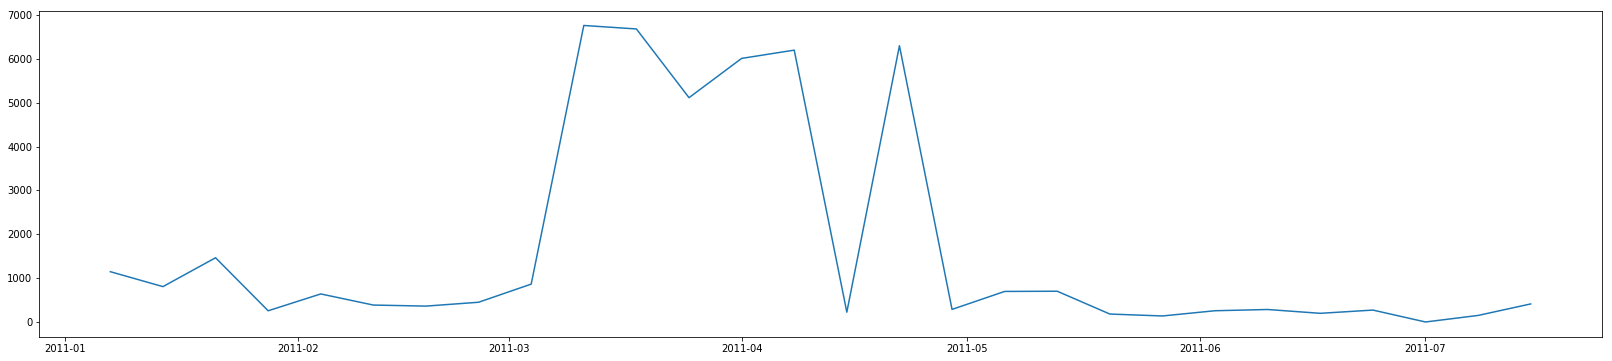

In [95]:
plt.plot(ts6)

In [97]:
from statsmodels.tsa.stattools import adfuller

In [116]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=4)
    rolstd = pd.rolling_std(timeseries, window=4)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=4).mean()
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=4).std()
  """


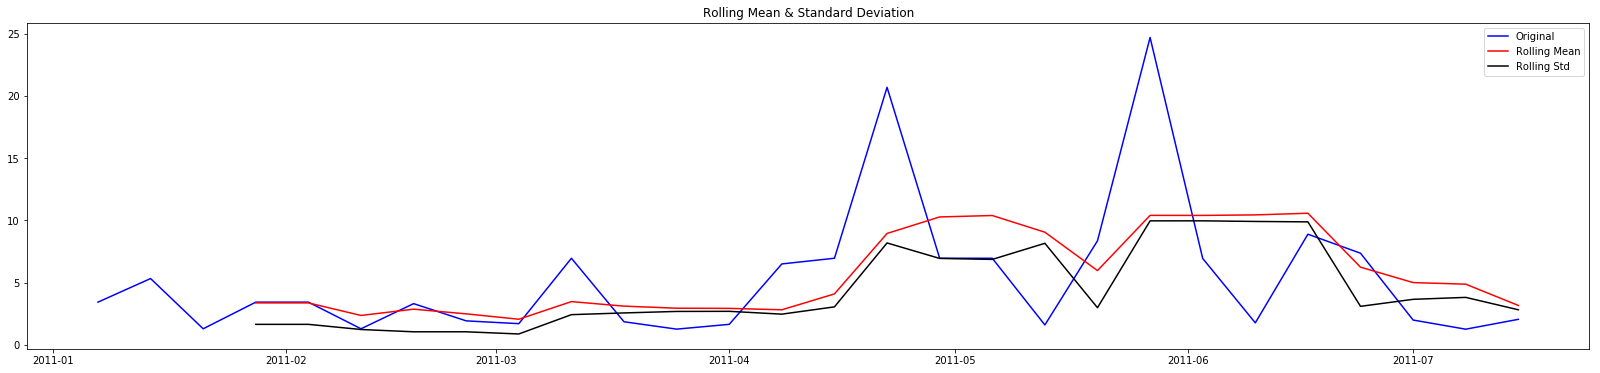

Results of Dickey-Fuller Test:
Test Statistic                 -3.903271
p-value                         0.002011
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (10%)           -2.627601
Critical Value (5%)            -2.976430
Critical Value (1%)            -3.699608
dtype: float64


In [118]:
test_stationarity(ts3)